# MileStoneProject_BitPredict

## Import Libraries

In [2]:
import numpy as np
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
print(f"This notebook was last run on:{datetime.datetime.now():%Y-%m-%d at %H:%M:%S}")
# Check for GPU
!nvidia-smi -L

This notebook was last run on:2025-09-14 at 12:48:59
/bin/bash: line 1: nvidia-smi: command not found


## Load dataset

In [6]:
!wget -P ../data/ https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
data_dir = "../data/"

--2025-09-14 13:18:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘../data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174,33K  1,06MB/s    in 0,2s    

2025-09-14 13:18:39 (1,06 MB/s) - ‘../data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Import time series data with Pandas

In [13]:
# import the dataset
import string
data_address =f"{data_dir}BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"
df = pd.read_csv(data_address, parse_dates=["Date"], index_col=["Date"]) # Parse the date column and tell pandas column 1 is a datetime

df.head(10)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


There's 2787 samples of Bitcoin prices from 2013 to 2021.
This is something you'll run into with time series data problems. Often, the number of samples isn't as large as other kinds of data.
For example, collecting one sample at different time frames leads to different number of samples.

So, the smaller number of samples, the more careful you need to be with your model design and evaluationc(data problem).

### Different ways to evaluate a time series model

In [15]:
# Closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price(USD)": "Price"})
bitcoin_prices.head(10)

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


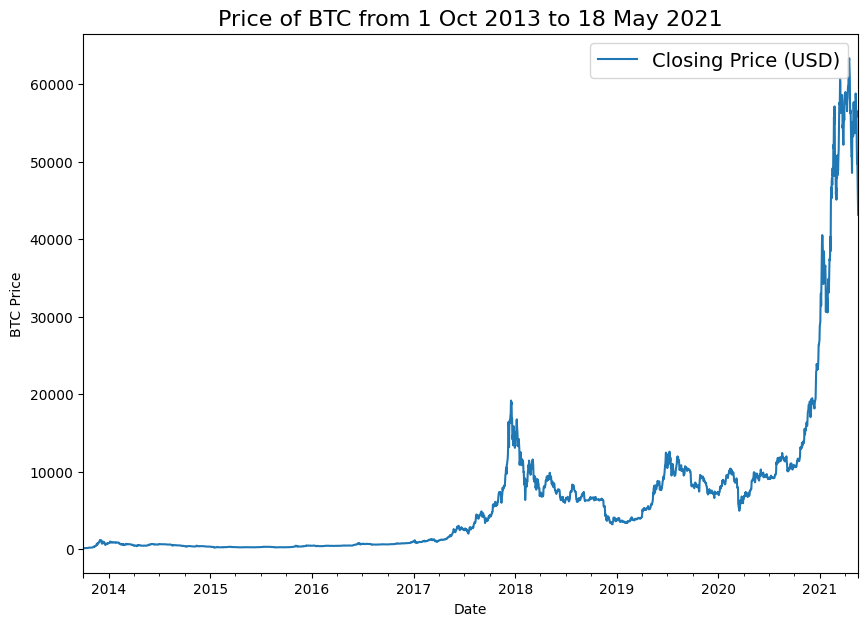

In [17]:
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of BTC from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)